In [1]:
%matplotlib inline

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import csv
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
plt.style.use('ggplot')

# Game instructions
Consider the following board game: A game board has 12 spaces. The swine senses the Christmas spirit and manages to run away from home couple of weeks beforehand. Fortunately for it, the butcher is a bit of a drunkard and easily distracted. The swine starts on space 7, and a butcher on space 1. On each game turn a 6-sided die is rolled. On a result of 1 to 3, the swine moves that many spaces forward. On a result of 5 or 6, the butcher moves that many spaces forward. On result 4, both advance one space forward. The swine wins if it reaches the river at space 12 (the final roll does not have to be exact, moving past space 12 is OK). The butcher wins if he catches up with the swine (or moves past it).

What are the probabilities of winning for the swine and the butcher?

Your assignment is to create a mathematical or statistical model to find these probabilities, and implement the solution as a computer program in whatever language you like. You will present it during the interview and we will discuss it with you. 

Consider the following questions as well: 
- Can you make your model easily extendable for different initial conditions (board size and initial positions)?
- Pros and cons of the approach?
- Can you say something about how long the game takes (also under different initial conditions)?

In [115]:
# Set moves for the swine.
swine_moveset = {
    1: 1,
    2: 2,
    3: 3,
    4: 1,
    5: 0,
    6: 0
}

# Set moves for the butcher.
butcher_moveset = {
    1: 0,
    2: 0,
    3: 0,
    4: 1,
    5: 5,
    6: 6
}

In [5]:
def play_game(param_dict, swine_moveset, butcher_moveset, return_moves = False):
    ''' Conduct one run of the butcher & swine game with parameters given in *param_dict*, a dictionary of:
    - board_size (location of the river)
    - swine_start (starting position of the swine)
    - butcher_start (starting position of the butcher)
    
    and dictionaries *swine_moveset* and *butcher_moveset* containing the relation between dice outcome and agents' moves.
    
    Return the winner of the game, number of turns played, and if desired the moves made by both agents.
    
    '''
    
    # Get initial positions.
    swine_pos = param_dict['swine_start']
    butcher_pos = param_dict['butcher_start']
    river_pos = param_dict['board_size']
    
    # Check if initial positions are valid.
    if butcher_pos >= swine_pos:
        raise ValueError('Error in starting positions: The swine has to start ahead of the butcher.')
    elif swine_pos >= river_pos:
        raise ValueError('Error in starting positions: The river has to lie ahead of the swine.')
    
    # Initiate dictionary to save the moves throughout the game.
    if return_moves == True:
        moves = {'swine': [swine_pos], 'butcher': [butcher_pos], 'dice_throws': [0]}
    
    j = 1 # Start turn counter.
    
    # Keep playing as long as the swine is ahead of the butcher and hasn't reached the river.
    while swine_pos > butcher_pos and swine_pos < river_pos:
              
        dice_throw = np.random.randint(1, 7) # Simulate the dice throw by selecting a random integer from 1 to 6.
        swine_pos += swine_moveset[dice_throw] # Update the swine's position.
        butcher_pos += butcher_moveset[dice_throw] # Update the butcher's position.
        
        if return_moves == True:
            moves['swine'].append(swine_pos)
            moves['butcher'].append(butcher_pos)
            moves['dice_throws'].append(dice_throw)
        
        j += 1
    
    # Save the winner of the game.
    if swine_pos <= butcher_pos:
        winner = 'butcher'       
    else:
        winner = 'swine'
    
    turns = j # Save the number of turns.
    
    if return_moves == True:
        return winner, turns, moves
    else:
        return winner, turns

# Simulations

In [86]:
# Specify number of simulations.
n_sims = 10

# Initial conditions.
params = {
    'board_size': [12, 16, 20],
    'swine_start': [5, 7, 11],
    'butcher_start': [1, 4, 7]
}

init_conditions = list(itertools.product(params['board_size'], params['swine_start'], params['butcher_start']))

# Filter out invalid starting positions.
init_conditions = list(itertools.compress(init_conditions, [i[1] > i[2] for i in init_conditions]))
init_conditions = list(itertools.compress(init_conditions, [i[0] > i[1] for i in init_conditions]))

# Create dataframe for simulation results.
sim_results = pd.DataFrame(np.zeros((n_sims * len(init_conditions), 5)), columns = ['board_size', 'swine_start', 'butcher_start', 'winner', 'turns'], dtype = int)


In [113]:
for j, config in enumerate(init_conditions):

    param_dict = {
        'board_size': config[0],
        'swine_start': config[1],
        'butcher_start': config[2]
    }

    sim_results.loc[n_sims*j:(n_sims)*(j+1), 'board_size'] = config[0]
    sim_results.loc[n_sims*j:(n_sims)*(j+1), 'swine_start'] = config[1]
    sim_results.loc[n_sims*j:(n_sims)*(j+1), 'butcher_start'] = config[2]
    
    # Run the game *n_sims* times and save the results.
    for i in range(n_sims):
        sim_results.loc[(n_sims)*j + i, ['winner', 'turns']] = play_game(param_dict, swine_moveset, butcher_moveset)

In [118]:
sim_results.to_csv('sim_results.csv')

Winning probabilities based on 10000 simulations: 
Swine 25.8% 
Butcher 74.2% 

Average length of the game: 6.26 turns.


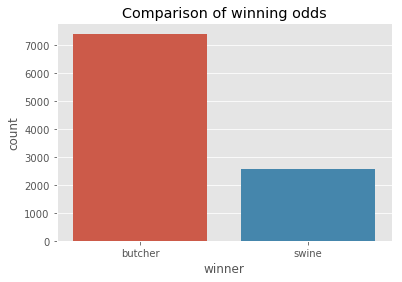

In [7]:
# Calculate the winning probabilities.
winning_probs = (pd.value_counts(sim_results['winner']) / sum(pd.value_counts(sim_results['winner']))) * 100

# Display outcomes.
print('Winning probabilities based on {} simulations: \nSwine {:.1f}% \nButcher {:.1f}% \n'.format(n_sims, winning_probs['swine'], winning_probs['butcher']))
print('Average length of the game: {:.2f} turns.'.format(np.average(sim_results['turns'])))

sns.countplot(data = sim_results, x = 'winner')
plt.title('Comparison of winning odds')
plt.show()

# Animation of the game
(needs a way to display video, e.g. ffmpeg)

In [116]:
# Set initial conditions.
params = {
    'board_size': 20,
    'swine_start': 7,
    'butcher_start': 1
}

winner, turns, moves = play_game(params, swine_moveset, butcher_moveset, return_moves = True)
swine_moves = np.array(moves['swine'])
butcher_moves = np.array(moves['butcher'])
dice_outcomes = np.array(moves['dice_throws'])

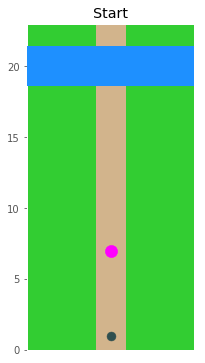

In [9]:
fig, ax = plt.subplots(figsize = (3, 6))
ax.set(xlim = (-1, 1), ylim = (0, params['board_size'] + 3))

grass = ax.plot([0, 0], [0, params['board_size'] + 3], color = 'limegreen', lw = 180, zorder = 1)
road = ax.plot([0, 0], [0, params['board_size'] + 3], color = 'tan', lw = 30, zorder = 2)
river = ax.plot([-1, 1], [params['board_size'], params['board_size']], color = 'dodgerblue', lw = 40, zorder = 3)
swine = ax.scatter(0, swine_moves[0], color = 'magenta', s = 150, zorder = 4)
butcher = ax.scatter(0, butcher_moves[0], color = 'darkslategrey', s = 80, zorder = 4)

plt.tick_params(axis = 'x', bottom = 'off', labelbottom = 'off') # Remove x-axis information.

def animate(i):
    
    # Plot course of the game graphically.
    y_i_swine = swine_moves[i]
    y_i_farmer = butcher_moves[i]
    swine.set_offsets(np.c_[0, y_i_swine])
    butcher.set_offsets(np.c_[0, y_i_farmer])
    
    # Display course of the game textually.
    if i == 0:
        ax.set_title('Start')
    elif i == turns - 1:
        ax.set_title('Round ' + str(i) + ': dice outcome is ' + str(dice_outcomes[i]) + '\nThe ' + winner + ' won!')
    else:
        ax.set_title('Round ' + str(i) + ': dice outcome is ' + str(dice_outcomes[i]))
    
anim = FuncAnimation(
    fig, animate, interval = 1500, frames = turns)

In [10]:
rc('animation', html='html5')
anim

In [11]:
anim.save('swine-escape.mp4')